In [1]:
import pandas as pd
import numpy as np

In [2]:
def wgbs_pre(file):
    WGBS = pd.read_table(file,compression='gzip')
    WGBS_WT1 = WGBS.reindex(['id','WT1'],axis=1)
    WGBS_WT1['chrom'] = [x[0][3:] for x in list(WGBS_WT1['id'].str.split('_'))]
    WGBS_WT1['start'] = [int(x[1])-1 for x in list(WGBS_WT1['id'].str.split('_'))]
    WGBS_WT1['end'] = [int(x[2]) for x in list(WGBS_WT1['id'].str.split('_'))]
    return WGBS_WT1

def longc_pre(file):
    Long_C = pd.read_csv(file,converters={'chrom':str})
    Long_C['start'] = [int(x[0][1:]) for x in Long_C['interval'].str.split(',')]
    Long_C['end'] = [int(x[1][:-1]) for x in Long_C['interval'].str.split(',')]
    return Long_C

In [11]:
# libraries
def gaussian_consistency(object1,object2,column1,column2,label1,label2,kind):
    compare = pd.merge(object1,object2,on=['chrom','start','end'],how='left').dropna()
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as font_manager
    font_dirs = ["/public/home/lizw/software/font"]
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 30
    
    fig, ax = plt.subplots(1,figsize=(10,10))
    from scipy.stats import gaussian_kde

    # fit an array of size [Ndim, Nsamples]
    # create data
    x = compare[column1]
    y = compare[column2]

    data = np.vstack([x, y])
    kde = gaussian_kde(data)

    # evaluate on a regular grid
    
    xgrid = np.linspace(x.min(), x.max(), 100)
    ygrid = np.linspace(y.min(), y.max(), 100)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

    # Plot the result as an image
    plt.imshow(Z.reshape(Xgrid.shape),
                origin='lower', aspect='auto',
                extent=[x.min(), x.max(),y.min(), y.max()],
                cmap='Blues',vmax=5)

    plt.xlabel(f'{label1}')
    plt.ylabel(f'{label2}')
    r = x.corr(y)
    plt.text(1.05,0.85,f'r={r:.2f}')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.savefig(f'/public/home/lizw/task/pore_c/methylation/deepsignal_plant/gaussian_{label1}_{label2}_{kind}.png',format='png',dpi=300,bbox_inches = 'tight')

In [4]:
WGBS_CG = wgbs_pre('/public/home/yuym/taiyi/data/BS_Seq/TAIR/public/WGBS_20210518/DMR/mergeRes/100/all_bins.cg.100.methratio.infobase.all_wt.repl_NA.100bp.gz')
WGBS_CHG = wgbs_pre('/public/home/yuym/taiyi/data/BS_Seq/TAIR/public/WGBS_20210518/DMR/mergeRes/100/all_bins.chg.100.methratio.infobase.all_wt.repl_NA.100bp.gz')
WGBS_CHH = wgbs_pre('/public/home/yuym/taiyi/data/BS_Seq/TAIR/public/WGBS_20210518/DMR/mergeRes/100/all_bins.chh.100.methratio.infobase.all_wt.repl_NA.100bp.gz')
Long_C_CG = longc_pre('/public/home/lizw/task/pore_c/methylation/deepsignal_plant/merge_CG_level_size_in_interval.csv')
Long_C_CHG = longc_pre('/public/home/lizw/task/pore_c/methylation/deepsignal_plant/merge_CHG_level_size_in_interval.csv')
Long_C_CHH = longc_pre('/public/home/lizw/task/pore_c/methylation/deepsignal_plant/merge_CHH_level_size_in_interval.csv')

In [ ]:
#merge and WGBS

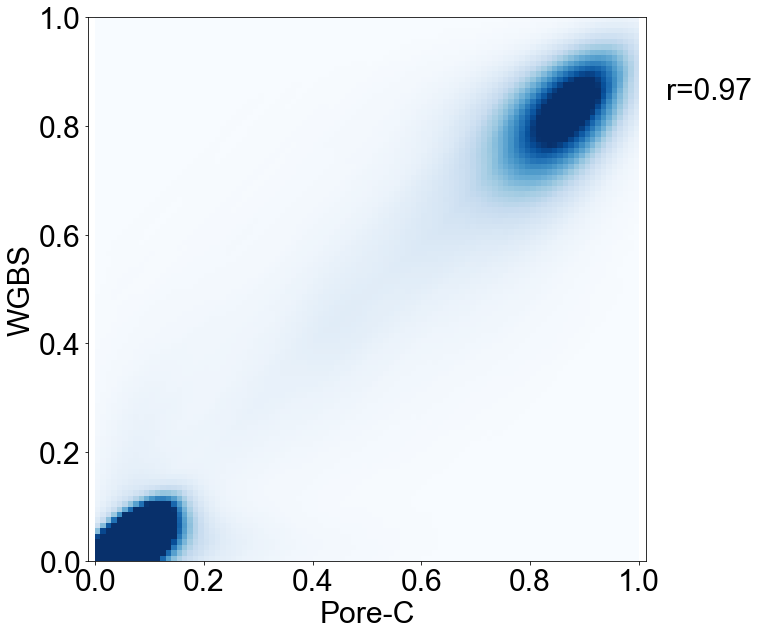

In [8]:
gaussian_consistency(Long_C_CG,WGBS_CG,'met_level','WT1','Pore-C','WGBS','CG')

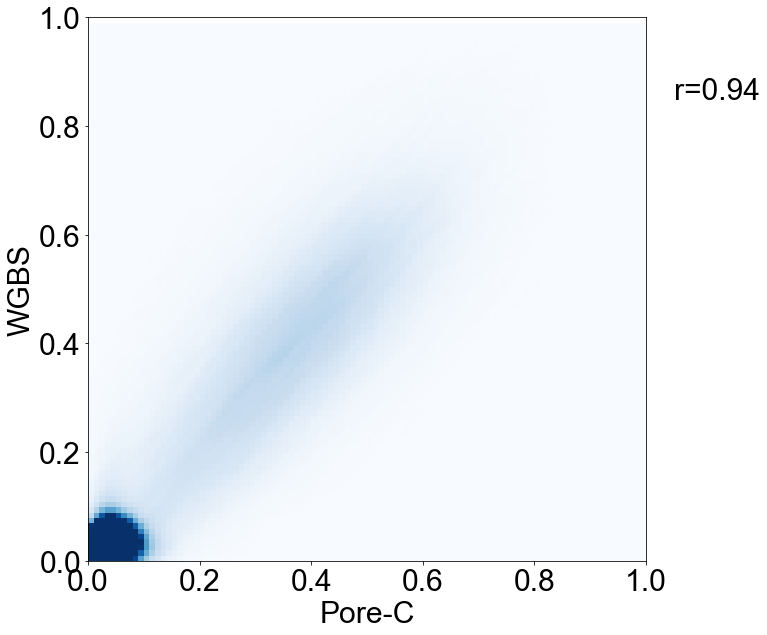

In [12]:
gaussian_consistency(Long_C_CHG,WGBS_CHG,'met_level','WT1','Pore-C','WGBS','CHG')

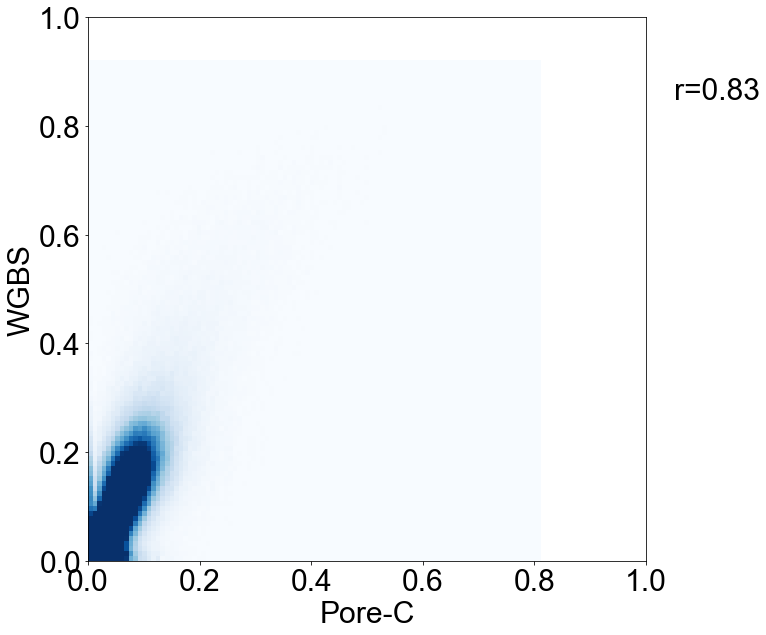

In [13]:
gaussian_consistency(Long_C_CHH,WGBS_CHH,'met_level','WT1','Pore-C','WGBS','CHH')

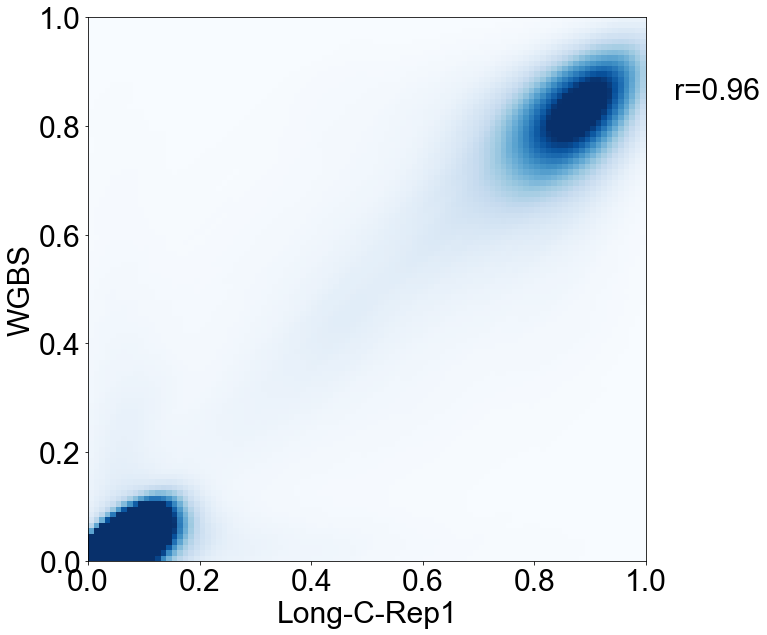

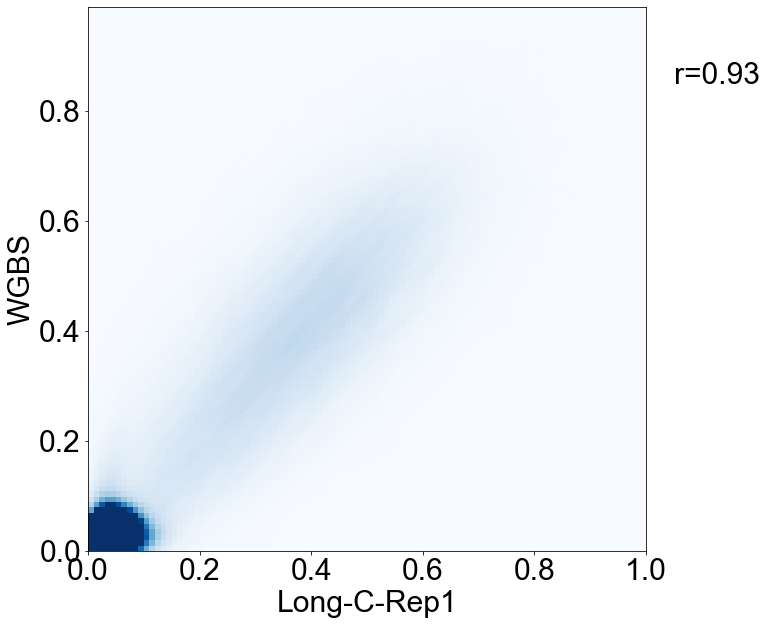

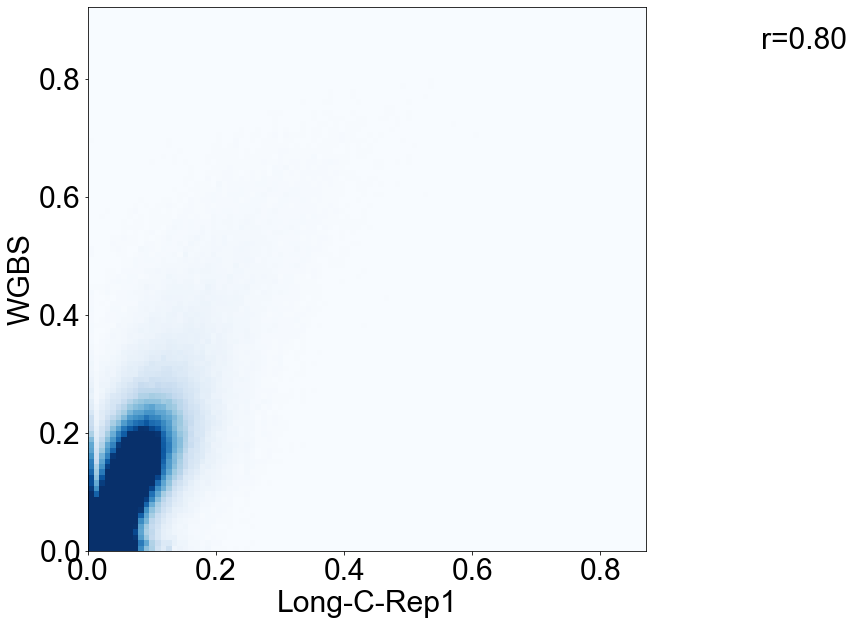

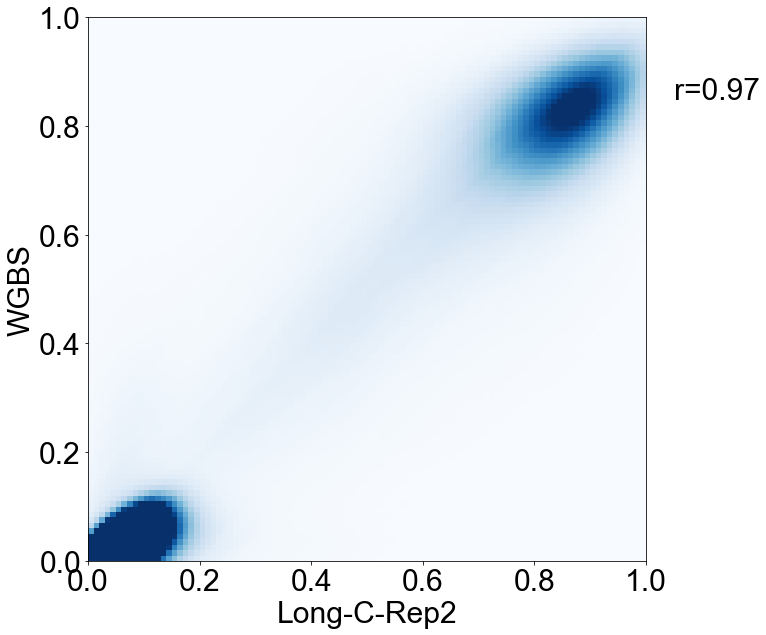

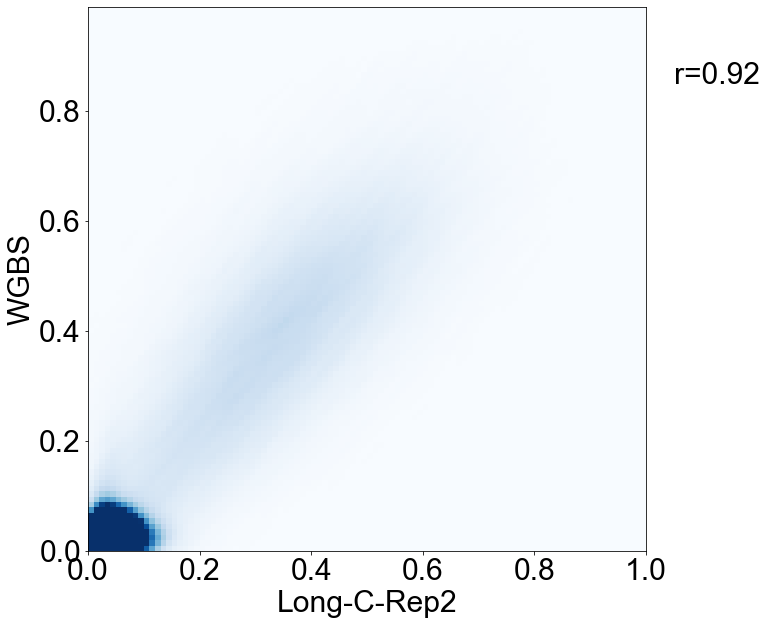

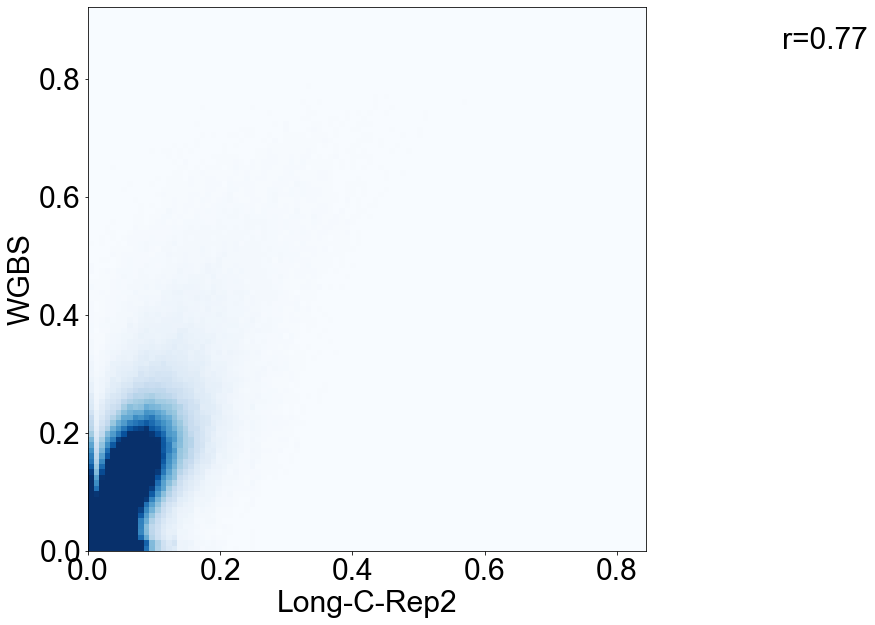

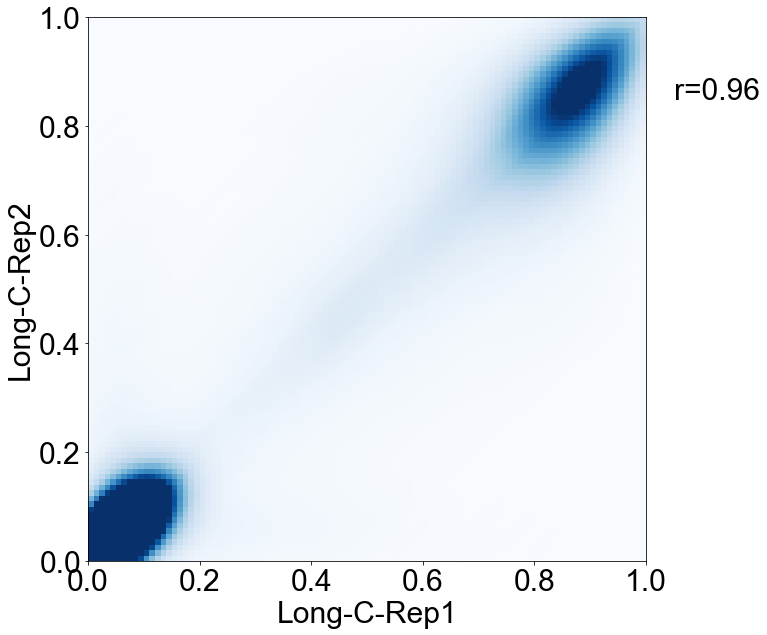

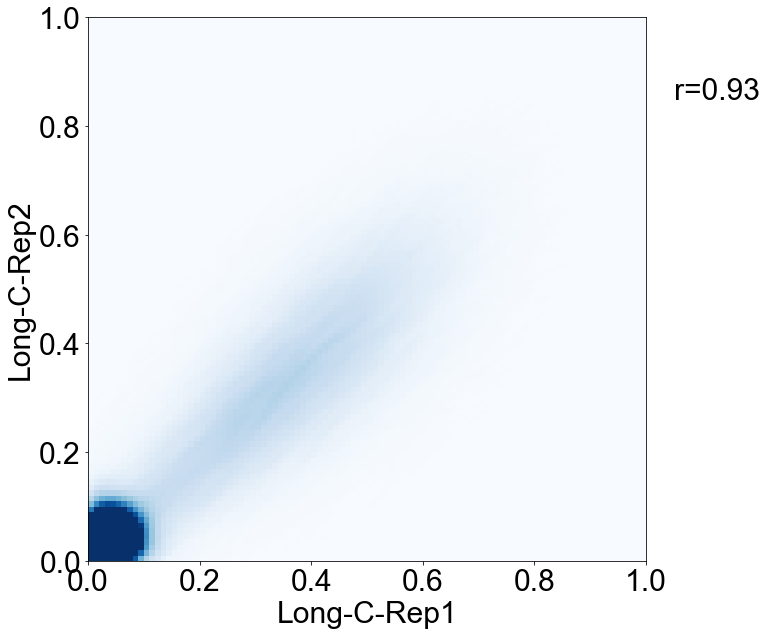

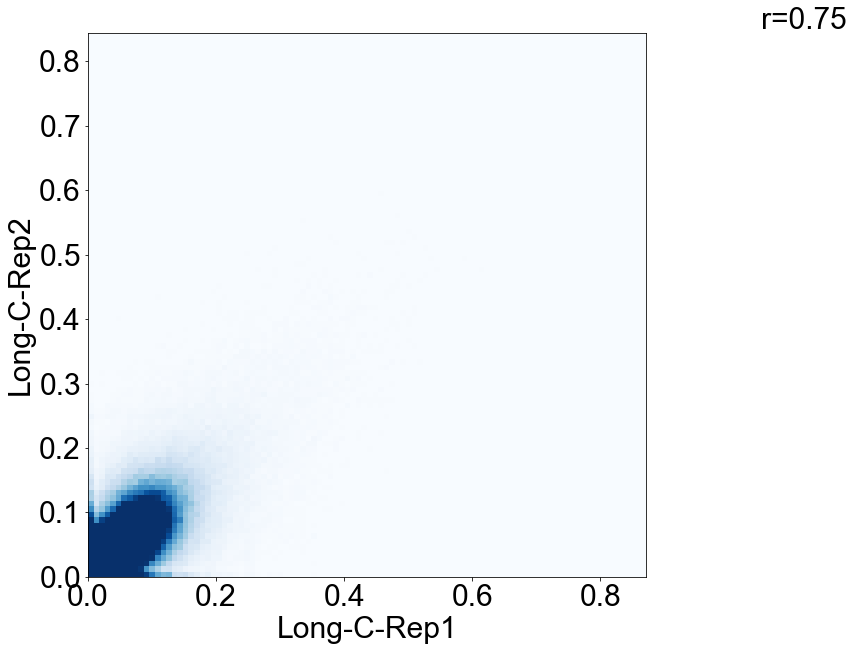

In [13]:
Long_C_CG_Rep1 = longc_pre('/public/home/lizw/task/pore_c/methylation/deepsignal_plant/rep1_CG_level_size_in_interval.csv')
Long_C_CHG_Rep1 = longc_pre('/public/home/lizw/task/pore_c/methylation/deepsignal_plant/rep1_CHG_level_size_in_interval.csv')
Long_C_CHH_Rep1 = longc_pre('/public/home/lizw/task/pore_c/methylation/deepsignal_plant/rep1_CHH_level_size_in_interval.csv')
Long_C_CG_Rep2= longc_pre('/public/home/lizw/task/pore_c/methylation/deepsignal_plant/rep2_CG_level_size_in_interval.csv')
Long_C_CHG_Rep2 = longc_pre('/public/home/lizw/task/pore_c/methylation/deepsignal_plant/rep2_CHG_level_size_in_interval.csv')
Long_C_CHH_Rep2 = longc_pre('/public/home/lizw/task/pore_c/methylation/deepsignal_plant/rep2_CHH_level_size_in_interval.csv')
gaussian_consistency(Long_C_CG_Rep1,WGBS_CG,'met_level','WT1','Long-C-Rep1','WGBS','CG')
gaussian_consistency(Long_C_CHG_Rep1,WGBS_CHG,'met_level','WT1','Long-C-Rep1','WGBS','CHG')
gaussian_consistency(Long_C_CHH_Rep1,WGBS_CHH,'met_level','WT1','Long-C-Rep1','WGBS','CHH')
gaussian_consistency(Long_C_CG_Rep2,WGBS_CG,'met_level','WT1','Long-C-Rep2','WGBS','CG')
gaussian_consistency(Long_C_CHG_Rep2,WGBS_CHG,'met_level','WT1','Long-C-Rep2','WGBS','CHG')
gaussian_consistency(Long_C_CHH_Rep2,WGBS_CHH,'met_level','WT1','Long-C-Rep2','WGBS','CHH')
gaussian_consistency(Long_C_CG_Rep1,Long_C_CG_Rep2,'met_level_x','met_level_y','Long-C-Rep1','Long-C-Rep2','CG')
gaussian_consistency(Long_C_CHG_Rep1,Long_C_CHG_Rep2,'met_level_x','met_level_y','Long-C-Rep1','Long-C-Rep2','CHG')
gaussian_consistency(Long_C_CHH_Rep1,Long_C_CHH_Rep2,'met_level_x','met_level_y','Long-C-Rep1','Long-C-Rep2','CHH')